In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

/home/shangeth/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shangeth/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/shangeth/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shangeth/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shangeth/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size ch

In [2]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_signs.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

y = 2


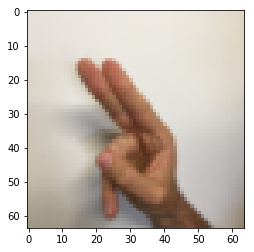

In [3]:
index = 16
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


Cost after epoch 0: 1.971088
Cost after epoch 50: 0.757222
Cost after epoch 100: 0.407330
Cost after epoch 150: 0.262889
Cost after epoch 200: 0.183110
Cost after epoch 250: 0.133937
Cost after epoch 300: 0.099568
Cost after epoch 350: 0.076023
Cost after epoch 400: 0.055183
Cost after epoch 450: 0.048478


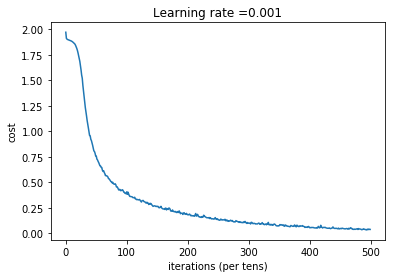

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9962963
Test Accuracy: 0.9


In [6]:
from cnn import CNN

clf = CNN()
clf.fit(X_train, Y_train, X_test, Y_test, learning_rate=0.001,num_epochs=500)